<a href="https://colab.research.google.com/github/mohamed7456/ML-Course-Assignments/blob/main/notebooks/02_linear_regression_%26_classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression and Classification from Scratch**
## Objective
This notebook demonstrates the implementation of two fundamental machine learning algorithms from scratch using NumPy:
1.  **Linear Regression:** To predict a continuous value by finding the line of best fit for a given set of data points.
2.  **Binary Classification:** To classify data into one of two categories using a linear model, based on the Iris dataset.

## **Part 1 - Prediction**
This part builds a linear regression model to find the coefficients of a line that best fits the data.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def linearEquation(x, a, b):
    """General linear equation: y = a * x + b"""
    return a * x + b

# Test cases
x_values = [0, 1, 2, 3, -1, -2]
test_cases = [
    (4, 3),   # y = 4x + 3
    (2, 1),   # y = 2x + 1
    (-1, 5),  # y = -x + 5
    (0, 10),  # y = 10
    (1.5, -2) # y = 1.5x - 2
]

for a, b in test_cases:
    print(f"Testing y = {a}x + {b}")
    print([linearEquation(x, a, b) for x in x_values])
    print()

Testing y = 4x + 3
[3, 7, 11, 15, -1, -5]

Testing y = 2x + 1
[1, 3, 5, 7, -1, -3]

Testing y = -1x + 5
[5, 4, 3, 2, 6, 7]

Testing y = 0x + 10
[10, 10, 10, 10, 10, 10]

Testing y = 1.5x + -2
[-2.0, -0.5, 1.0, 2.5, -3.5, -5.0]



In [29]:
x_values = np.array([2, 5, 7, 11, 15])
y_values = []
for i in range(len(x_values)):
  y_values.append(linearEquation(x_values[i], a=4, b=3))
y_values

[np.int64(11), np.int64(23), np.int64(31), np.int64(47), np.int64(63)]

### **Preparing the Data: Creating the Design Matrix (X)**

To solve for the model's weights (coefficients), we need to format our input data `x_values` into a **design matrix**, which we'll call `X`.

According to the linear equation `y = b + ax` (or `y = w_0 * 1 + w_1 * x`), we have two coefficients to find:
*   `w_0`: The y-intercept or bias term.
*   `w_1`: The slope.

To solve for both simultaneously, we need to add a "dummy" feature to our `x_values`. This dummy feature is always `1` and corresponds to the intercept `w_0`.

So, for each `x_i`, our input vector becomes `[1, x_i]`. The cell below creates this matrix `X` by adding a column of ones to our `x_values`.

In [30]:
X = np.vstack((np.ones_like(x_values), x_values)).T
X

array([[ 1,  2],
       [ 1,  5],
       [ 1,  7],
       [ 1, 11],
       [ 1, 15]])

### **Calculating the Model Parameters (W) using the Normal Equation**
---

image.png

---

The image above shows the **Normal Equation**, which is an analytical approach to finding the optimal weights (`W`) for a linear regression model. The formula is:

`W = (X^T * X)^-1 * X^T * y`

Where:
- `W`: The vector of our model's weights (e.g., `[w_0, w_1]`).
- `X`: The design matrix we just created (with the column of ones).
- `y`: The vector of target values.
- `X^T`: The transpose of the design matrix `X`.
- `( ... )^-1`: The inverse of a matrix.

The function `calculate_W` below implements this equation step-by-step using NumPy.

In [31]:
def calculate_W(X, y):
    # Transpose the design matrix X: X^T
    X_transposed = np.transpose(X)

    # Multiply the transposed matrix by the original matrix: (X^T * X)
    X_transposed_times_X = np.dot(X_transposed, X)

    # Calculate the inverse of the result: (X^T * X)^-1
    inverse_X_transposed_times_X = np.linalg.inv(X_transposed_times_X)

    # Multiply the transposed matrix by the target vector y: (X^T * y)
    X_transposed_times_y = np.dot(X_transposed, y)

    # Finally, calculate the weights W by multiplying the two results
    # W = (X^T * X)^-1 * (X^T * y)
    W = np.dot(inverse_X_transposed_times_X, X_transposed_times_y)
    return W

W = calculate_W(X, y_values)
W

array([3., 4.])

In [32]:
print('The original equation: y = 4x + 3')
print(f'Equation of the best fit line: y = {W[1]}x + {W[0]}')

The original equation: y = 4x + 3
Equation of the best fit line: y = 4.000000000000001x + 2.9999999999999933


In [33]:
# add some noise
noise = np.random.rand(5)
y_values_noisy = linearEquation(x_values, a=4, b=3) + noise
W_noisy = calculate_W(X, y_values_noisy)

print(f'Equation after adding some noise: y = {W_noisy[1]}x + {W_noisy[0]}')

Equation after adding some noise: y = 3.9666047003981983x + 3.683255506474996


## **Part 2 - Classification with the Iris Dataset**
This part uses a linear model to solve a binary classification problem.

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [35]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In this section, we will use a linear model to perform classification. The goal is to build a model that can distinguish between different species of Iris flowers.

The Iris dataset contains 150 samples from three species (50 each):
- `0`: Iris Setosa
- `1`: Iris Versicolour
- `2`: Iris Virginica

For simplicity, we will convert this into a **binary classification problem**. We will train a model to distinguish **Class I (Iris Setosa)** from **Class II (everything else)**.

In [36]:
# Class I
X_classI = X_iris[y_iris == 0]
# Class II
X_classII = X_iris[(y_iris == 1) | (y_iris == 2)]
y_classII = y_iris[(y_iris == 1) | (y_iris == 2)]

In [37]:
# Splitting Data
from sklearn.model_selection import train_test_split
# Class I
X_train_classI, X_test_classI, y_train_classI, y_test_classI = train_test_split(X_classI, [0] * X_classI.shape[0], test_size = 10, random_state = 42)
# Class II
X_train_classII, X_test_classII, y_train_classII, y_test_classII = train_test_split(X_classII, y_classII, test_size = 20, random_state = 42)

In [38]:
y_train_classI = np.ones((X_train_classI.shape[0],))
y_train_classII = np.ones((X_train_classII.shape[0],))

y_test_classI = np.ones((X_test_classI.shape[0],))
y_test_classII = np.ones((X_test_classII.shape[0],))

In [39]:
X_trainClassI = np.vstack((np.ones_like(y_train_classI), X_train_classI.T)).T
X_trainClassII = np.vstack((np.ones_like(y_train_classII), X_train_classII.T)).T

In [40]:
X_train = np.concatenate((X_trainClassI, -1 * X_trainClassII))
X_train

array([[ 1. ,  4.8,  3. ,  1.4,  0.1],
       [ 1. ,  5. ,  3.6,  1.4,  0.2],
       [ 1. ,  4.9,  3.6,  1.4,  0.1],
       [ 1. ,  4.4,  2.9,  1.4,  0.2],
       [ 1. ,  4.6,  3.1,  1.5,  0.2],
       [ 1. ,  4.6,  3.4,  1.4,  0.3],
       [ 1. ,  4.5,  2.3,  1.3,  0.3],
       [ 1. ,  5.1,  3.8,  1.6,  0.2],
       [ 1. ,  4.6,  3.2,  1.4,  0.2],
       [ 1. ,  5.7,  4.4,  1.5,  0.4],
       [ 1. ,  4.9,  3.1,  1.5,  0.1],
       [ 1. ,  5.4,  3.9,  1.3,  0.4],
       [ 1. ,  4.8,  3.4,  1.9,  0.2],
       [ 1. ,  4.9,  3.1,  1.5,  0.2],
       [ 1. ,  5.4,  3.4,  1.5,  0.4],
       [ 1. ,  5.1,  3.5,  1.4,  0.2],
       [ 1. ,  5.1,  3.8,  1.9,  0.4],
       [ 1. ,  5.2,  3.5,  1.5,  0.2],
       [ 1. ,  5.5,  4.2,  1.4,  0.2],
       [ 1. ,  5.4,  3.9,  1.7,  0.4],
       [ 1. ,  4.7,  3.2,  1.6,  0.2],
       [ 1. ,  4.8,  3.4,  1.6,  0.2],
       [ 1. ,  5.5,  3.5,  1.3,  0.2],
       [ 1. ,  4.9,  3. ,  1.4,  0.2],
       [ 1. ,  5.1,  3.7,  1.5,  0.4],
       [ 1. ,  4.7,  3.2,

### **Data Preprocessing: One-vs-Rest Strategy**

We are using a **One-vs-Rest (OvR)** approach. We've defined two groups:
- **Class I:** All samples where `y_iris == 0` (Setosa).
- **Class II:** All other samples (`y_iris == 1` or `y_iris == 2`).

The goal is to find a decision boundary (a line or hyperplane) that separates Class I from Class II.

### **Preparing Data for Linear Classification**

To use our linear regression solver for classification, we use a clever trick. We want to find a weight vector `W` such that the sign of `W.X` tells us the class of a sample.

- For **Class I** samples (`X_trainClassI`), we want `W.X > 0`.
- For **Class II** samples (`X_trainClassII`), we want `W.X < 0`.

We can achieve this by creating a new training set `X_train` where the feature values of all Class II samples are multiplied by -1. Then, we can train the model to make all outputs positive.

The target `y` will simply be a vector of ones. The `calculate_weights` function will then find a `W` that tries to satisfy `W * X_train > 0` for all samples.

In [41]:
X_test = np.vstack((X_test_classI, -1 * X_test_classII))
X_test

array([[ 4.3,  3. ,  1.1,  0.1],
       [ 5.1,  3.4,  1.5,  0.2],
       [ 4.8,  3.1,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.3],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.3,  3.7,  1.5,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5.2,  4.1,  1.5,  0.1],
       [ 5.1,  3.8,  1.5,  0.3],
       [-6.3, -2.8, -5.1, -1.5],
       [-6.3, -2.9, -5.6, -1.8],
       [-6.9, -3.2, -5.7, -2.3],
       [-5.7, -3. , -4.2, -1.2],
       [-5.6, -2.7, -4.2, -1.3],
       [-5.5, -2.5, -4. , -1.3],
       [-6.3, -2.5, -4.9, -1.5],
       [-7.4, -2.8, -6.1, -1.9],
       [-5. , -2. , -3.5, -1. ],
       [-7. , -3.2, -4.7, -1.4],
       [-6.2, -2.2, -4.5, -1.5],
       [-5.5, -2.4, -3.8, -1.1],
       [-6.3, -2.7, -4.9, -1.8],
       [-6. , -2.7, -5.1, -1.6],
       [-6.7, -3.1, -5.6, -2.4],
       [-6.5, -2.8, -4.6, -1.5],
       [-6.2, -2.8, -4.8, -1.8],
       [-6.1, -3. , -4.9, -1.8],
       [-6. , -2.2, -4. , -1. ],
       [-5.5, -2.4, -3.7, -1. ]])

In [42]:
y_train = np.concatenate((y_train_classI, y_train_classII), axis=0)
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### **Calculating the Weight Vector (W)**

---


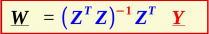

---

The `calculate_weights` function below is identical to the one we used for regression. It solves the normal equation `W = (Z^T * Z)^-1 * Z^T * y`.

However, its purpose here is different:
- **`Z`**: Our modified training data (`X_train`), where Class II features have been negated.
- **`y`**: A vector of ones.
- **`W`**: The resulting weight vector is not a line of best fit, but the normal vector to the **decision boundary hyperplane** that separates the two classes.

In [43]:
def calculate_weights(X_train, y_train):
    Z = X_train
    Z_transpose = Z.T
    Z_transpose_Z = np.dot(Z_transpose, Z)
    Z_transpose_Z_inv = np.linalg.inv(Z_transpose_Z)
    Z_transpose_Z_inv_Z_transpose = np.dot(Z_transpose_Z_inv, Z_transpose)

    W = np.dot(Z_transpose_Z_inv_Z_transpose, y_train)

    return W

W2 = calculate_weights(X_train, y_train)
W2

array([-0.72396059,  0.12016826,  0.47807312, -0.41859655, -0.16621896])

In [44]:
def check_classes(X_train, W, y_train):
    y_pred_train = np.sign(X_train @ W)

    return y_pred_train, y_train

y_pred_train, y_train_original = check_classes(X_train, W2, y_train)
print("Original classes:", y_train_original)
print("Predicted classes:", y_pred_train)

Original classes: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Predicted classes: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
y_pred_train, y_train_original = check_classes(X_train, W2, y_train)

def accuracy(y_pred, y_original):
  matching = np.sum(y_pred == y_original)
  total_samples = len(y_pred)
  accuracy = matching / total_samples

  print("Matching samples:", matching)
  print("Total samples:", total_samples)
  print("Accuracy:", accuracy)

print("Check class of training data:")
accuracy(y_pred_train, y_train_original)

Check class of training data:
Matching samples: 120
Total samples: 120
Accuracy: 1.0


In [46]:
def predict(X_test, W):
    # First, add the bias term (a column of ones) to the test data.
    # This is crucial, as the model was trained on data with a bias term.
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Calculate the dot product of the test data and the weight vector.
    # The sign of the result determines the predicted class.
    # np.sign() returns +1 if the value is positive, and -1 if it's negative.
    y_pred_test = np.sign(X_test_bias @ W)

    return y_pred_test

y_pred_test = predict(X_test, W2)
print("Predicted classes:")
for i, x in enumerate(y_pred_test):
  if x == 1:
    print(f"Sample {i} belongs to ClassI")
  elif x == -1:
    print(f"Sample {i} belongs to ClassII")
  else:
    print(f"Sample {i} Undefined")

Predicted classes:
Sample 0 belongs to ClassI
Sample 1 belongs to ClassI
Sample 2 belongs to ClassI
Sample 3 belongs to ClassI
Sample 4 belongs to ClassI
Sample 5 belongs to ClassI
Sample 6 belongs to ClassI
Sample 7 belongs to ClassI
Sample 8 belongs to ClassI
Sample 9 belongs to ClassI
Sample 10 belongs to ClassII
Sample 11 belongs to ClassII
Sample 12 belongs to ClassII
Sample 13 belongs to ClassII
Sample 14 belongs to ClassII
Sample 15 belongs to ClassII
Sample 16 belongs to ClassII
Sample 17 belongs to ClassII
Sample 18 belongs to ClassII
Sample 19 belongs to ClassII
Sample 20 belongs to ClassII
Sample 21 belongs to ClassII
Sample 22 belongs to ClassII
Sample 23 belongs to ClassII
Sample 24 belongs to ClassII
Sample 25 belongs to ClassII
Sample 26 belongs to ClassII
Sample 27 belongs to ClassII
Sample 28 belongs to ClassII
Sample 29 belongs to ClassII
